# Package

In [ ]:
!nvidia-smi

Sun Nov 28 13:32:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    34W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import os

drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/Colabs')
DATA_ROOT_DIR="/content/drive/MyDrive/Colabs/shopee-sentiment"

Mounted at /content/drive/


In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.0 MB/s 
     |████████████████████████████████| 3.3 MB 40.8 MB/s 
     |████████████████████████████████| 59 kB 5.0 MB/s 
     |████████████████████████████████| 596 kB 51.1 MB/s 
     |████████████████████████████████| 895 kB 42.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!pip install fastBPE
!pip install fairseq

  Created wheel for fastBPE: filename=fastBPE-0.1.0-cp37-cp37m-linux_x86_64.whl size=483117 sha256=150d42022daaf5256b6b9c0ab4b9cf59c79618bc28cd80a9ecba34eb9ff5c05f
  Stored in directory: /root/.cache/pip/wheels/bd/d4/0e/0d317a65f77d3f8049fedd8a2ee0519164cf3e6bd77ef886f1
Successfully built fastBPE
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
     |████████████████████████████████| 145 kB 51.0 MB/s 
     |████████████████████████████████| 90 kB 10.2 MB/s 
     |████████████████████████████████| 112 kB 44.5 MB/s 
     |████████████████████████████████| 74 kB 3.3 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=04dbe802044040417eaa50c72b65f7522fb5f0e639903f17bc9547dc594c0a78
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built antlr4-python3-runtime


In [ ]:
# Install the vncorenlp python wrapper
!pip install vncorenlp

# Download VnCoreNLP-1.1.1.jar & its word segmentation component (i.e. RDRSegmenter) 
# !mkdir -p vncorenlp/models/wordsegmenter
# !wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
# !wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
# !wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
# !mv VnCoreNLP-1.1.1.jar vncorenlp/ 
# !mv vi-vocab vncorenlp/models/wordsegmenter/
# !mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/

     |████████████████████████████████| 2.6 MB 5.3 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645951 sha256=e822d0b8875ffe439d19495e3d18556baad89aa498a1d9ec225516e5b5a4d4ed
  Stored in directory: /root/.cache/pip/wheels/0c/d8/f2/d28d97379b4f6479bf51247c8dfd57fa00932fa7a74b6aab29
Successfully built vncorenlp


In [ ]:
from vncorenlp import VnCoreNLP
rdrsegmenter = VnCoreNLP("/content/drive/MyDrive/Colabs/vncorenlp/VnCoreNLP-1.1.1.jar", annotators="wseg", max_heap_size='-Xmx500m') 

text = "Đại học Quốc Gia Hà Nội"

word_segmented_text = rdrsegmenter.tokenize(text) 
print(word_segmented_text)

[['Đại_học', 'Quốc_Gia', 'Hà_Nội']]


In [ ]:
# !wget https://public.vinai.io/PhoBERT_base_transformers.tar.gz
# !tar -xzvf PhoBERT_base_transformers.tar.gz

# Load data new data

In [ ]:
def load_csv_data(filepath, textcol="text"):
    df = pd.read_csv(filepath)
    samples = [ str(text) for text in df[textcol] ]
    labels  = [ intent for intent in df["label"] ]

    return samples, labels

In [ ]:
DEV_TRAIN_CSV = "/content/drive/MyDrive/Colabs/data/train_dev.csv"
VAL_CSV = "/content/drive/MyDrive/Colabs/data/test_dev.csv"

In [ ]:
train_samples, train_labels = load_csv_data(DEV_TRAIN_CSV, textcol="text_ws")
test_df = pd.read_csv(VAL_CSV)
test_indices = [str(text) for text in test_df["id"]]
test_samples = [str(text) for text in test_df["text_ws"]]
test_labels = [intent for intent in test_df["label"]]

In [ ]:
trainText = train_samples

In [ ]:
labelText = train_labels

In [ ]:
trainText[0:10]

['không ngon lắm khô mềm và có mùi . mình',
 'chất_lượng sản_phẩm kém . 1 ngày dùng chết 3 lần',
 'chất_lượng sản_phẩm rất kém quá tệ . mã không sử_dụng được . mua ngày 3-11 hsd đến ngày 20-11 ra cửa_hàng báo ngày 1-11 hết hạn .',
 'quần_áo bị rách mà vẫn giao cho khách',
 'trả tiền rồi . không cho đồng kiểm . kiểm xong không có hàng .',
 'hàng không đúng với quảng_cáo quá thất_vọng . không hài_lòng',
 'cửa_hàng vận_chuyển hơi chậm',
 'da hơi ngăm dùng cushion hay kem nền có tông sáng thì sài màu 1.5 là tốt nha . hơi sáng xíu nhưng bù lại lúc đánh_phấn mắt lên là tuyệt_vời luôn .',
 'sp đúng như qc giao hàng nhanh theo nhu_cầu',
 'sang pham tot nhưng ma sop noi mua hang 150 ngan mien phi sip sao giao hang lai tinh tien sip']

In [ ]:
labelText[0:10]

[1, 1, 1, 1, 1, 1, 0, 0, 0, 1]

# Data analytics

In [ ]:
!pip install \
   pandas matplotlib numpy \
   nltk seaborn sklearn gensim pyldavis \
   wordcloud textblob spacy textstat

In [ ]:
from textblob import TextBlob
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
data = pd.read_csv(DEV_TRAIN_CSV)

In [ ]:
analyticsText = data['text']

In [ ]:
data['polarity'] = analyticsText.map(lambda text: TextBlob(text).sentiment.polarity)
data['review_len'] = analyticsText.astype(str).apply(len)
data['word_count'] = analyticsText.apply(lambda x: len(str(x).split()))
data['sentence_count'] = analyticsText.apply(lambda x: len(str(x).splitlines()))

In [ ]:
analyticsText.str.len()

0         38
1         47
2        129
3         37
4         63
        ... 
12864     17
12865     15
12866     24
12867     45
12868    183
Name: text, Length: 12869, dtype: int64

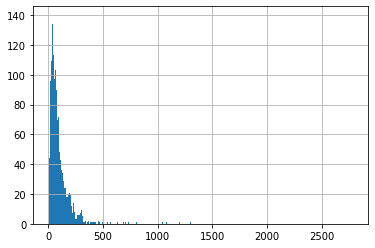

In [ ]:
# the number of characters present in each sentence
npMax = np.max(analyticsText.str.len())
analyticsText.str.len().hist(bins=npMax,range=[0,npMax])

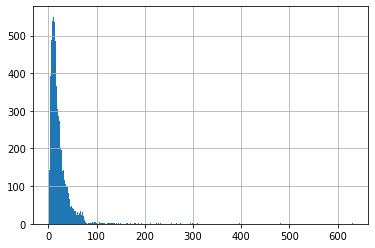

In [ ]:
# the number of words present in each sentence
npMax1 = np.max(data['word_count'])
data['word_count'].hist(bins=npMax1,range=[0, npMax1])

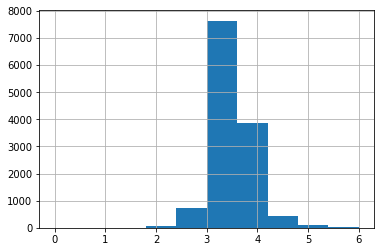

In [ ]:
# average word length in each sentence.
tmp = analyticsText.str.split().\
   apply(lambda x : sum(len(word) for word in x) / len(x))
tmp.hist(range=[0, 6])

In [ ]:
# # the number of sentence present in each sentence
# npMax2 = np.max(data['sentence_count'])
# data['sentence_count'].hist(bins=npMax2)

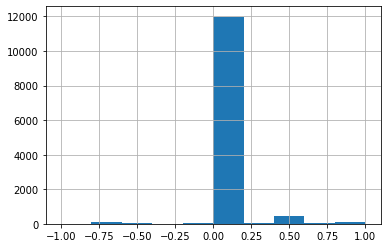

In [ ]:
# Sentiment analysis
data['polarity'].hist()

In [ ]:
# raw
corpus=[]
new= analyticsText.str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

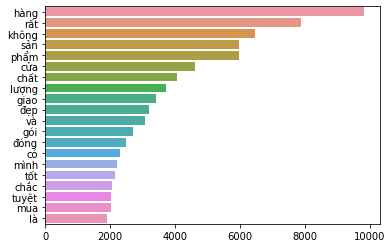

In [ ]:
# raw
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
        x.append(word)
        y.append(count)
# top cac tu duoc dung nhieu nhat        
sns.barplot(x=y,y=x)

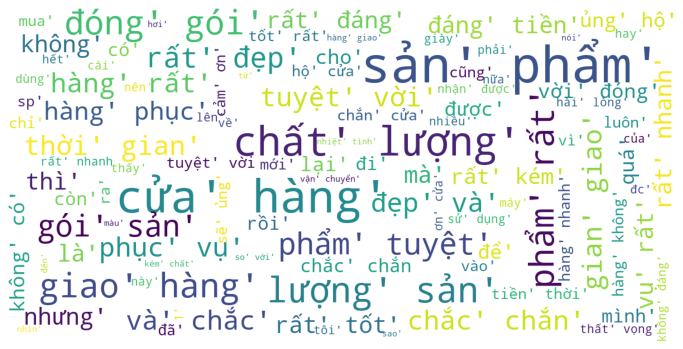

In [ ]:
# word cloud raw
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [ ]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

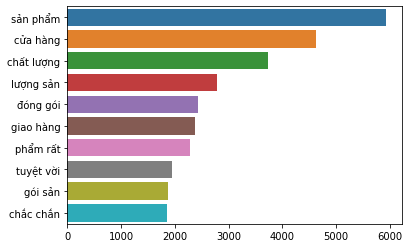

In [ ]:
# raw text
top_bi_bigrams=get_top_ngram(analyticsText,2)[:10]
x2,y2=map(list,zip(*top_bi_bigrams))
sns.barplot(x=y2,y=x2)

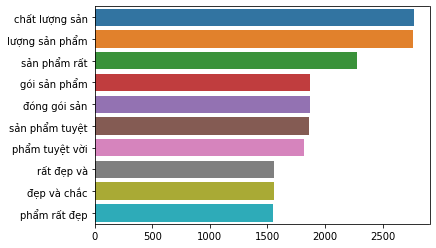

In [ ]:
# raw text
top_tri_grams=get_top_ngram(analyticsText,n=3)
x3,y3=map(list,zip(*top_tri_grams))
sns.barplot(x=y3,y=x3)

In [ ]:
numClassPositive = [x for x in data["label"] if x == 0]
numClassNegative = [x for x in data["label"] if x == 1]
print(len(numClassPositive))
print(len(numClassNegative))

7396
5473


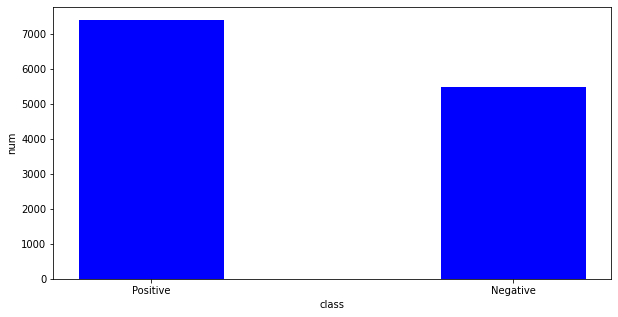

In [ ]:
import matplotlib.pyplot as plt
data = {'Positive':len(numClassPositive), 'Negative':len(numClassNegative)}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 
plt.xlabel("class")
plt.ylabel("num")
plt.show()


# Model

In [ ]:
from fairseq.data.encoders.fastbpe import fastBPE
from fairseq.data import Dictionary
import argparse

parser = argparse.ArgumentParser()
parser.add_argument('--bpe-codes', 
    default="/content/drive/MyDrive/Colabs/PhoBERT_base_transformers/bpe.codes",
    required=False,
    type=str,
    help='path to fastBPE BPE'
)
args, unknown = parser.parse_known_args()
bpe = fastBPE(args)

# Load the dictionary
vocab = Dictionary()
vocab.add_from_file("/content/drive/MyDrive/Colabs/PhoBERT_base_transformers/dict.txt")

In [ ]:
bpe.encode("Test thử bpe của PhoBert xem thế nào")

'Test thử b@@ pe của Pho@@ Ber@@ t xem thế nào'

In [ ]:
vocab.encode_line('<s> ' + 'Test dictionary : đại học công nghệ!' + ' </s>')

tensor([    0, 50398, 64000,    27,  2919,   222,   675, 64001,     2,     2],
       dtype=torch.int32)

In [ ]:
from sklearn.model_selection import train_test_split

train_sents, val_sents, train_labels, val_labels = train_test_split(trainText, labelText, test_size=0.2)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
MAX_LEN = 250

train_ids = []
for sent in train_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    train_ids.append(encoded_sent)

val_ids = []
for sent in val_sents:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    val_ids.append(encoded_sent)
    
train_ids = pad_sequences(train_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
val_ids = pad_sequences(val_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")

In [ ]:
train_masks = []
for sent in train_ids:
    mask = [int(token_id > 0) for token_id in sent]
    train_masks.append(mask)

val_masks = []
for sent in val_ids:
    mask = [int(token_id > 0) for token_id in sent]

    val_masks.append(mask)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch
train_inputs = torch.tensor(train_ids)
val_inputs = torch.tensor(val_ids)
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)
train_masks = torch.tensor(train_masks)
val_masks = torch.tensor(val_masks)

train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = SequentialSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=32)

In [ ]:
from transformers import RobertaForSequenceClassification, RobertaConfig, AdamW

config = RobertaConfig.from_pretrained(
    "/content/drive/MyDrive/Colabs/PhoBERT_base_transformers/config.json", from_tf=False, num_labels = 2, output_hidden_states=False,
)
PHOBERT = RobertaForSequenceClassification.from_pretrained(
    "/content/drive/MyDrive/Colabs/PhoBERT_base_transformers/model.bin",
    config=config
)

You are using a model of type bert to instantiate a model of type roberta. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at /content/drive/MyDrive/Colabs/PhoBERT_base_transformers/model.bin were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.decoder.bias', 'roberta.pooler.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification

In [ ]:
PHOBERT.cuda()

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=0)
      (position_embeddings): Embedding(258, 768, padding_idx=0)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [ ]:
import numpy as np
import time
from sklearn.metrics import f1_score, accuracy_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    
    F1_score = f1_score(pred_flat, labels_flat, average='macro')
    
    return accuracy_score(pred_flat, labels_flat), F1_score

In [ ]:
start = time.time()

In [ ]:
import random
from tqdm import notebook
device = 'cuda'
epochs = 2

param_optimizer = list(PHOBERT.named_parameters())
no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
]

optimizer = AdamW(optimizer_grouped_parameters, lr=1e-5, correct_bias=False)


for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    total_loss = 0
    PHOBERT.train()
    train_accuracy = 0
    nb_train_steps = 0
    train_f1 = 0
    
    for step, batch in notebook.tqdm(enumerate(train_dataloader)):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        PHOBERT.zero_grad()
        outputs = PHOBERT(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask, 
            labels=b_labels)
        loss = outputs[0]
        total_loss += loss.item()
        
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        tmp_train_accuracy, tmp_train_f1 = flat_accuracy(logits, label_ids)
        train_accuracy += tmp_train_accuracy
        train_f1 += tmp_train_f1
        nb_train_steps += 1
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(PHOBERT.parameters(), 1.0)
        optimizer.step()
        
    avg_train_loss = total_loss / len(train_dataloader)
    print(" Accuracy: {0:.4f}".format(train_accuracy/nb_train_steps))
    print(" F1 score: {0:.4f}".format(train_f1/nb_train_steps))
    print(" Average training loss: {0:.4f}".format(avg_train_loss))

    print("Running Validation...")
    PHOBERT.eval()
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    eval_f1 = 0
    for batch in notebook.tqdm(val_dataloader):

        batch = tuple(t.to(device) for t in batch)

        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            outputs = PHOBERT(b_input_ids, 
            token_type_ids=None, 
            attention_mask=b_input_mask)
            logits = outputs[0]
            logits = logits.detach().cpu().numpy()
            label_ids = b_labels.to('cpu').numpy()

            tmp_eval_accuracy, tmp_eval_f1 = flat_accuracy(logits, label_ids)

            eval_accuracy += tmp_eval_accuracy
            eval_f1 += tmp_eval_f1
            nb_eval_steps += 1
    print(" Accuracy: {0:.4f}".format(eval_accuracy/nb_eval_steps))
    print(" F1 score: {0:.4f}".format(eval_f1/nb_eval_steps))
print("Training complete!")

======== Epoch 1 / 2 ========
Training...


0it [00:00, ?it/s]

 Accuracy: 0.8694
 F1 score: 0.8592
 Average training loss: 0.3119
Running Validation...


  0%|          | 0/81 [00:00<?, ?it/s]

 Accuracy: 0.8873
 F1 score: 0.8795
======== Epoch 2 / 2 ========
Training...


0it [00:00, ?it/s]

 Accuracy: 0.9162
 F1 score: 0.9117
 Average training loss: 0.2171
Running Validation...


  0%|          | 0/81 [00:00<?, ?it/s]

 Accuracy: 0.9005
 F1 score: 0.8953
Training complete!


In [ ]:
end = time.time()

In [ ]:
end - start

1814.0471115112305

# Validate

In [ ]:
import torch

In [ ]:
SAVE_MODEL_PATH = "/content/drive/MyDrive/Colabs/saveModel/PhoBertNewData.pt"
torch.save(PHOBERT, SAVE_MODEL_PATH)

In [ ]:
modelSave = torch.load(SAVE_MODEL_PATH)
modelSave

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(64001, 768, padding_idx=0)
      (position_embeddings): Embedding(258, 768, padding_idx=0)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0): RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerN

In [ ]:
# test the model with some sentence
inputs = [
    "Món ăn ngon, đồ uống ngon, rẻ",
    "Món ăn ngon",
    "Tuy rẻ nhưng đồ ăn không ngon, đồ uống không ngon",
    "không gian chật hẹp, nhân viên nhiệt tình, đồ ăn ngon",
    "hàng rất tốt, đẹp, mẫu mã đa dạng, sẽ quay lại lần sau"
  ]
MAX_LEN = 250

test_ids = []
for sent in inputs:
    subwords = '<s> ' + bpe.encode(sent) + ' </s>'
    encoded_sent = vocab.encode_line(subwords, append_eos=True, add_if_not_exist=False).long().tolist()
    test_ids.append(encoded_sent)
test_ids = pad_sequences(test_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
test_inputs = torch.tensor(test_ids)

test_masks = []
for sent in test_ids:
    mask = [int(token_id > 0) for token_id in sent]
    test_masks.append(mask)

test_masks = torch.tensor(test_masks)

test_data = TensorDataset(test_inputs, test_masks)

b_input_ids = test_inputs.to(device)
b_input_mask = test_masks.to(device)

outputs = modelSave(b_input_ids, 
    token_type_ids=None, 
    attention_mask=b_input_mask)

logits = outputs["logits"]
score = torch.softmax(logits, dim=-1)
Labels = ["Positive", "Negative"]

for index ,item in enumerate(inputs):
    print(f"The sentence: '{inputs[index]}' has {Labels[torch.argmax(score[index], dim=-1).item()]} tone with confident score : {score[index][torch.argmax(score[index], dim=-1).item()]} \n" )


The sentence: 'Món ăn ngon, đồ uống ngon, rẻ' has Positive tone with confident score : 0.983880341053009 

The sentence: 'Món ăn ngon' has Positive tone with confident score : 0.9785182476043701 

The sentence: 'Tuy rẻ nhưng đồ ăn không ngon, đồ uống không ngon' has Negative tone with confident score : 0.7013049125671387 

The sentence: 'không gian chật hẹp, nhân viên nhiệt tình, đồ ăn ngon' has Positive tone with confident score : 0.9812964797019958 

The sentence: 'hàng rất tốt, đẹp, mẫu mã đa dạng, sẽ quay lại lần sau' has Positive tone with confident score : 0.9939184188842773 

